# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


In [1]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
#linear regression is a regression model which assume e a linear relationship between input variables and single
#output variable. The output is a linear combination of input variables Y = a0 + a1x1 + a2x2 + ...
#Polynomial is a special case of linear regression used when a linear relatoinship cannot accurately fit the data
#points. Polynomial regression can take x, x^2, x^3,... as variables and assume a linear relatoinships between output
#and these variables. Y = a0 + a1x + a2x^2 + a3x^3 +...
#Overfitting is when a model learns too much detail and noise in the training data and no longer accurately predict the
#performance of test data. The parameters are note generalized emougj for model to make predictions on data 
#with unfamiliar error
#Underfitting is when a model cannot fit the data well enough, specifically, when a model shows low variance and high bias

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

In [13]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
#logistic regression outputs only binary result by estimating probabilities using logistic function (often sigmoid),
#training process finds weights by minimizing the logistic loss function, the weights will be applied 
#to the input of the sigmoid function

#Support Vector Machines is a supervised ML algorithm used for both classfication and regression challenges. Each data item
#is plotted as a point in n-D space where n is the number of features. We find the hyper-plane which differentiates the 
#two classes. Support vectors are the data points closest to the hyperplane, which will define the decision boundary.
#First identify the best hyper-plane segregating classes well. This is achieved by lowing classification error and
#maximizing the margin (distances between hyperplane and support vectors)

#Sometimes data is not linearly seperable, slack variables can be introduced to measure the ratio of each data point's 
#distance from a marginal hyperplane to the magnitude of its hyperplane's normal vector. The model will optimize a function
#to include both marjins and the sum of slack variables during training.
#SVM can use kernels to make non-separable probelms separable by using kernels, which are functions to take 
#low dimensional input space and transform it to higher dimensional space. Kernels are very useful in non-linear separation
#problems

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

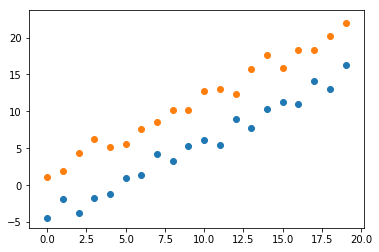

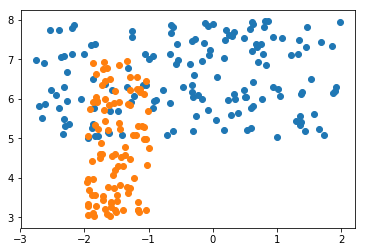

In [31]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
#Supervised learning trains a model to predict output according to labelled data. On the other hand, unsupervised learning
#is used for unlabeled data. The model will find patterns in features on its own.

#K-NN is short for K-nearest neighbour algorithm. It is an algorithm in which the function is only approximated locally 
#and all computtation is deferred until classification. It does not do any generalization, i.e. no or minimal traning phase
#so that all traning data is needed during the testing phase. A use case can be credit ratings. In nature, people who have 
#similar financial behaviours wil be given similar credit rating. Therefore, no extra training or calculation is needed,
#and existing data base can be used to predict a new customer's credit rating.

#First specify a value for hyperparameter k, which is the number of closest neighbours a test data will be compared against.
#To get the predicted class, iterate from 1 to total number of training data points. First calculate the distance between
#test data and each row of training data; then sort the calculated distance in ascending order, get top k rows from the
#sorted array, get the most frequet class of these rows and finally return the predicted class.

#sample dataset for SVM classification
import numpy as np
import matplotlib.pyplot as plt
X = [num for num in range(20)]

Y1 = [(num -3 + np.random.normal(-1,1)) for num in X]
Y2 = [(num +3 + np.random.normal(-1,1)) for num in X]

plt.scatter(X,Y1)
plt.scatter(X,Y2)
plt.show()

#sample dataset for k-NN distribution
X1 = np.random.rand(1,150)*5-3
Y1 = np.random.rand(1,150)*3+5

X2 = np.random.rand(1,100)-2
Y2 = np.random.rand(1,100)*4+3

plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [39]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

## YOUR CODE HERE
def distance (x,y):
    dist=np.sqrt(np.power((x-y),2).sum())
    return dist
#choose test and train data
test = iris_df.iloc[-1,:-2] #last row, last two columns
data = iris_df.iloc[0:-1,:]

# step 1: choose k
k=10

# step 2: loop through all data values and calculate distance

for x in range (len(data)):
    dist = distance(test,data.iloc[x, :-2])
    data.iloc[x,-1] = dist
    
# step 3: sort distances
    data['distance'] = np.nan
    iris_sorted = data.sort_values(by='distance').reset_index(drop=True)
    
# step 4: find k closest neighbours
neigh = iris_sorted.loc[:k,'target']

# step 5: result
labels = {}
for x in range(len(neigh)):
    label = neigh[x]
    
    if label in labels:
        labels[label] += 1
    else: 
        labels[label]=1
        
sorted_labels = sorted(labels.items())
output = sorted_labels[1][1]

print('predicted label: {}'.format(output))
print('actual label: {}'.format(iris_df.iloc[-1,-1]))

C:\Users\tsofr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tsofr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


predicted label: 1
actual label: 2.0


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

In [3]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
#Using ensembling techniques like bagging and boosting can both decrease the variance and increase robustness of the model

#bagging is the application of bootstrap procedure to a high-variance machine learning algorithm.Suppose there are
#N observations and M features. A sample from observations is randomly selected with replacement, this procedure is called 
#bootstraping. A subset of features are selected to create a model of sample of observations and subset of features.
#Features from subset are selected to give the best split on training data. This is repeated to create many models, all
#models are trained in parallel. Prediction is based on the aggregation of predictions from all models.

#boosting is a group of algorithms in which each algorithm runs and predicts what feature the next model will focus on. 

#The difference between bagging and boosting is that in bagging each model work independently, and in boosting all models 
#work together.

#Boosting is better suited if the single model gets a very low performance, since bagging will rarely get a better bias.
#But boosting can generate a combined model with lower errors since it optimises the advantages and reduces the pitfalls
#of single models
#If the difficulty of the single model is over-fitting, then bagging is the better option because boosting cannot avoid it.

In [5]:
#Decision tree can be used for both classificaiton and regression. Tree answers questions in a sequential manner and 
#goes down a certain route. It behaves in "if... then..." manner.  Random Forest can also be used for both regression and
#classification problems. This algorithm creates an ensemble of decision trees but make it random, and mostly trained with
#bagging method. Random Forest merges multiple decision trees and get a more accurate and stable prediction.

#DT Pros:
#Straightforward internal working and reproducible.
#Perform well on large datasets
#Extremely Fast

#DT Cons:
#At each node it makes the most optimal decision, but does not consider the global optimum
#Prone to overfitting, especially with large tree depth.
#Instability: Perturb the dataset, change the root node of tree to start with a different variable, you will get a different
#tree. Not robust to noise.

#RF pros:
#easy to use. Default hyperparameters often produce good prediction result.
#Reduces variance. not prone to overfitting with many decision trees
#Decorrelates trees, important when multiple features are correlated

#RF cons:
#Not as easy to visually interpret
#Large number of trees may make algorithm slow. Fast to train but slow to predict.
#Cannot learn non-linear low level representations easily like neural networks.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

In [6]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
#First draw a line from the mean of x and y, every point will be projected on this axis. The two points at the end of line 
#gives the variance of the data. Connect each point to its projection, these lines representhe the errors of appxoximating
#by its projection. The squared sum of the lengths of all these lines gives the total error in approximation. The angle 
#of axis which minimizes the squared sum of errors also maximizes the distance between the red points, called principle axis
#Once we know a principal axis, we subtract the variance along this principal axis to obtain the remaining variance.
#We apply the same procedure to find the next principal axis from the residual variance. Apart from being the direction of 
#maximum variance, next principal axis must be orthogonal to the other principal axes. Once, we get all the principal axes, 
#the dataset is projected onto these axes. The columns in the projected or transformed dataset are called principal 
#components

#In the context of PCA, an eigenvector represents a direction or axis and the corresponding eigenvalue represents variance
#along that eigenvector. First find the eigenvalues. Then arrange all eigenvalues in order. Once all eigenvectors are
#arranged according to their eigenvalues in descending order. Now, we have to decide how many eigenvectors to retain. 
#Total variance explained and scree plot are two methods to achieve that. Last step is to project dataset to these principle
#axes

#subtracting the mean will produce the covariance matrix whose mean is zero, this scales the data to unit variance

In [ ]:
#Autoencoder is a family of neural networks, its input is the same of the output. Autoencoders work by compressing the input
#into a latent-space representation, and then reconstruct the output from this representation. The autoencoders has the 
#main advantage of mapping non-linear relationships while the PCA is restricted to linear mapping.
#A single layer of neurons smaller than the input, autoencoder with linear transfer function is nearly equivalent to PCA.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [8]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


MLP accuracy with PCA: 0.49224806201550386


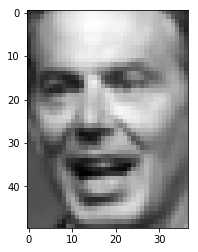

In [17]:
import matplotlib.pyplot as plt
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(X)

X_pca = pca.transform(X)

#split data 80-20
x_train_pca = X_pca[:1030]
y_train_pca = y[:1030]

x_test_pca = X_pca[1030:]
y_test_pca = y[1030:]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train_pca, y_train_pca)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(5, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
y_pred_pca = clf.predict(x_test_pca)
print('MLP accuracy with PCA: {}'.format(accuracy_score(y_test_pca, y_pred_pca)))

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

